<a href="https://colab.research.google.com/github/EderCruz/Alura-ImersaoDados/blob/main/Eder_Barbosa_Projeto_Final_Bootcamp_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Aluno:** Eder Cruz Barbosa
https://www.linkedin.com/in/eder-barbosa-92908411a/

https://github.com/EderCruz

###**PROJETO Final - Bootcamp Ciência de Dados:** 
###**Predição de Admissão na UTI do Hospital Sírio Libanês utilizando PCA**

#RESUMO
Este trabalho, **mega desafio do Módulo 02 - 
Analisar os casos de COVID-19 em uma perspectiva de Séries Temporais**, se propõe a verificar  a relação da cobertura vacinal do Brasil, da quantidade de vacinas inoculadas, também enfatizando na 1º e 2º dose de tríplice viral, correlacionando com propagação de fake news, os movimentos antivacina, as eleições presidências de 2018, e o **Efeito Bolsonaro** no contexto da pandemia de COVID19[12].

Dados Análisados:
 - Cobertura Vacinal de 2014 a 2019 por UF (TabSus)
 - Mapa do 2º turno das eleições presidências de 2018 por UF (Wikipedia)

#1. Introdução
A pandemia de COVID-19 (*Coronavirus Disease 2019*) é caracterizada pelae proliferação de uma doença respiratória causada pelo vetor coronavírus da síndrome respiratória aguda grave 2 (*SARS-CoV-2*) [1][2]. O primeiro registro desta doença é de dezembro de 2019 em Wuhan, na China [3], em  janeiro de 2020, a Organização Mundial da Saúde (OMS) classificou como Emergência de Saúde Pública de Âmbito Internacional e, em 11 de março de 2020, como pandemia [2]. 

Desde do inicio a pandemia a COVID-19 vem causando colapso no sistemas de sáude ao redor do mundo e sobrecarregando Unidades de Terapia Intensivo (UTI), necessitando da reelaboração os críterios de admissão nesses locais de tratamento. Médicos intensivistas, por fim, são incubidos da difícil responsabilidade de decidir quais pacientes devem ou naõ serem encaminhados para a UTI [4]

>*Entendemos que os médicos não devem arcar sozinhos com o peso de decisões emocionalmente tão difíceis e que a população deva ter que arcar com o trauma de testemunhar mortes que poderiam ser evitadas com a ampliação de serviços*[4]

Até a data presente deste trabalho (18/04/2021), o Brasil acumulou 13.900.901 casos, 371.678 óbitos acumulados, e o recorde de 4.249 morte em 24 horas no dia 08/04/2021 [5].

Neste contexto, surge a necessidade de obter um modelo de predição que possa amenizar o colapso do sistema de saude e considere os elementos de admissão em UTI (Quantidade de camas, Recursos Humanos, Profissionais capacitados etc).

Utilizando os dados disponibilizados pelo Hospital Sirio libanês - São Paulo e Brasília, sobre admissão em UTI, disponiveis no plataforma kaggle [6], este trabalho se propõe a analisar estes dados e utilizar um algoritmo de predição que possa auxiliar na tomada de decisão na admissão de paciente em UTI.

Nesta base de dados encontramos quatro grupos de informações:

- Informação demográfica - 3 variáveis
- Doenças pré-existentes - 9 variáveis
- Resultados do exame de sangue - 36 variáveis
- Sinais vitais - 6 variáveis

O objetivo, portanto, é prever quais pacientes precisarão ser admitidos na UTI a partir dos dados clínicos individuais disponíveis.



#2. Método
Análisar os dados referentes a cobertura vacinal dos estados em que o Pres. Bolsonaro venceu a eleição de 2018:
 - Captura as informações de eleição dos estados de 2018
 - Elencar os estados em que o Pres. Bolsonaro venceu e perdeu as eleições em 2018
 - Obter as informações sobre Cobertura vacinal no Tabnet do SUS
 - Análisar e comparar as as informações obtidas no mapa de vitórias e derrotas do presidente Bolsonaro com as informações sobre Cobertura vacinal do SUS
 - Verficar a relação entre esses gráficos, dados e informações.

#3. Características da base de dados.
A base de dados do Hospital Sírio-Libanês contên informações anonimizadas dos pacientes, provenientes de São Paulo e Brasil.

A base apresente quatro grupos de informações:

- Informação demográfica - 3 variáveis
- Doenças pré-existentes - 9 variáveis
- Resultados do exame de sangue - 36 variáveis
- Sinais vitais - 6 variáveis

E o conceito de **Janela**, uma campo que apresenta um valor entre 0 e 12, que indica em qual hora aquele paciente foi admitido na UTI:

<table>
<tr>
    <th>Janela</th>
    <th>Hora de Admissão na UTI</th>
  </tr>
    <tr>
    <td>0-2</td>
    <td>0 a 2 horas para admissão</td>
  </tr>
  <tr>
    <td>0-2</td>
    <td>0 a 2 horas para admissão</td>
    <tr>
    <td>2-4</td>
    <td>2 a 4 horas para admissão</td>
    <tr>
    <td>4-6</td>
    <td>4 a 6 horas para admissão</td>
    <tr>
    <td>6-12</td>
    <td>6 a 12 horas para admissão</td>
    <tr>
    <td>Acima de 12</td>
    <td>Acima a 12 horas para admissão</td>

Isto significa que os dados do paciente só podem ser utilizados antes do tempo de admissão na UTI.

#3. Carregamentos dos dados

Importação de Bibliotecas

In [369]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


##3.1. Carregamento das bases de dados e tratamento das tabelas

In [370]:
caminho_dados_uti_sirio_libanes = '/content/drive/MyDrive/Arquivos_Data_Science_Carregar_Colab/projeto_final_pred_UCI/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'

dados_uti_sirio_libanes = pd.read_excel(caminho_dados_uti_sirio_libanes)

# **3.2 Funções**

Função que utiliza uma estratégia de preenchimento de dados contínuos faltantes na base de dados do Sírio Libanês

In [371]:
def preenche_base_dados_faltantes(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

Função que exibe a matriz de dados faltantes

In [372]:
def exibe_matriz_faltantes(dados):
  ax = msno.matrix(dados, figsize=(30, 15), fontsize=7, labels=True)
  ax.set_title('Matriz de Dados Faltantes', fontsize=30)

In [373]:
def plot_countplot_horizontal(dados, coluna_alvo, titulo, label_x, label_y):
  plt.figure(figsize=(10,6))
  sns.set_theme(style="darkgrid")
  ax = sns.countplot(y=coluna_alvo, data=dados)
  ax.set_title(titulo, {'size':16})
  ax.set_ylabel(label_y, {'size':16})
  ax.set_xlabel(label_x, {'size':16})
  for p in ax.patches:
        value = format(p.get_width())
        x = p.get_x() + p.get_width() + 2
        y = p.get_y() + p.get_height()/2
        ax.annotate(value, (x, y))

In [374]:
def constroi_df_categorico(dados):
  num_rows = dados.shape[0]
  dados_f = dados.T
  dados_f['Apresenta'] = dados_f.sum(axis=1)
  dados_f['Nao_apresenta'] = num_rows - dados_f['Apresenta'] 
  dados_f = dados_f[['Apresenta','Nao_apresenta']]
  return dados_f

In [375]:
def plot_dados_categorigos(dados, titulo, label_y):
  ax = dados.plot(kind='bar', figsize=(18,8))
  plt.title(titulo)
  plt.xticks(rotation=45)
  plt.grid(True, linestyle='--')
  plt.ylabel('label_y')

In [376]:
def prepare_window(rows):
  if(np.any(rows['ICU'])):
    rows.loc[rows["WINDOW"] == '0-2', 'ICU'] = 1
  return  rows.loc[rows["WINDOW"] == '0-2']

In [377]:
def prepara_continuos(dados):
  dados_result = dados.copy()
  dados_result = dados_result.drop(['PATIENT_VISIT_IDENTIFIER'], axis=1)
  dados_result = dados_result.reset_index()
  dados_result = dados_result.drop(['PATIENT_VISIT_IDENTIFIER','level_1'], axis=1)
  return dados_result

In [414]:
def melt_continuos(df_alvo_melt):
  tab_melt = df_alvo_melt.T.reset_index().melt(id_vars = ['index'], value_vars=df_alvo_melt.T.columns )
  tab_melt.columns = ["tipo_categoria","id","valor"]
  return tab_melt

In [432]:
def barplot_continuos(dados, titulo, labelx, labely):
  plt.figure(figsize=(15,22))
  ax = sns.boxplot( y='tipo_categoria', x='valor', data = dados );
  sns.set_theme(style="whitegrid")
  ax.set_title(titulo, {'size':16})
  ax.set_ylabel(labely, {'size':16})
  ax.set_xlabel(labelx, {'size':16})
  plt.show()

##3.3. Análise da Bases de Dados do Sírio Libanês ICU

In [378]:
dados_uti_sirio_libanes.head(7)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [379]:
dados_uti_sirio_libanes.tail(7)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1918,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.160494,-0.538462,-0.188679,-0.525424,-0.107143,0.684211,-0.160494,-0.538462,-0.188679,-0.517241,-0.107143,0.684211,0.030928,-0.250,-0.076923,-0.428571,0.318681,0.878788,-0.418803,-0.675676,-0.358209,-0.575758,-0.275362,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
1919,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.210526,0.210526,0.210526,0.210526,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.975929,-0.975929,...,-0.978029,-1.0,-0.083298,-0.478691,-0.190414,-0.541009,0.036125,0.705989,-0.160494,-0.538462,-0.188679,-0.517241,0.000000,0.736842,-0.175258,-0.375,-0.418803,-0.714286,0.164835,0.797980,-0.076923,-0.470270,-0.029851,-0.393939,0.043478,0.894737,-0.478261,-0.644172,-0.358779,-0.588235,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,ABOVE_12,0
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.012346,-0.292308,0.056604,-0.525424,0.535714,0.789474,0.012346,-0.292308,0.056604,-0.517241,0.535714,0.789474,0.175258,-0.050,0.145299,-0.428571,0.714286,0.919192,-0.299145,-0.502703,-0.164179,-0.575758,0.246377,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.717277,-0.717277,-0.717277,-0.717277,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.170732,-0.170732,-0.170732,-0.170732,-1.0,-0.982208,-0.982208,...,-0.979571,-1.0,0.086420,-0.384615,-0.113208,-0.593220,0.142857,0.578947,0.086420,-0.384615,-0.113208,-0.586207,0.142857,0.578947,0.237113,-0.125,-0.008547,-0.500000,0.472527,0.838384,-0.247863,-0.567568,-0.298507,-0.636364,-0.072464,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [380]:
dados_uti_sirio_libanes.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000

A tabela apresenta 1925 linhas, porém o campo **PATIENT_VISIT_IDENTIFIER** informa o identificador do paciente, sendo que cada linha representa uma estado de monitoria do paciente naquela **window** (janela) de tempo. Portanto, temos 385 pacientes ( valor max do campo **PATIENT_VISIT_IDENTIFIER** mais o paciente 0 ) , e 1925 registros dos mesmo.


Existem três colunalas referentes a informações demográficas dos pacientes: [4]
- **AGE_ABOVE65**: Paciente maior de 65 anos valor 1, menos valor 0
- **AGE_PERCENTIL**: Categoriza a idade do paciente em faixa etária de décadas
- **GENDER**: Indica gênero, 0 ou 1	

Nove colunas referentes a doenças de conhecimento prévio
- De **DISEASE GROUPING 1** a **DISEASE GROUPING 6**
- **HTN**
- **IMMUNOCOMPROMISED** - Se o paciente é imunocompromedido.
- **OTHER**

36 colunas referentes a exames de sangue
- Apresentam média (*mean*), mediana(*median*), máximo (*max*), mínimo (*min*), diferença entre máximo e mínimo (*diff = max - min*), e diferença relativa (*diff/median*)

Seis colunas referentes a sinais vitais
- Também apresentam média (*mean*), mediana(*median*), máximo (*max*), mínimo (*min*), diferença entre máximo e mínimo (*diff = max - min*), e diferença relativa (*diff/median*)



In [381]:
dados_uti_sirio_libanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [382]:
dados_uti_sirio_libanes.select_dtypes(include='object')


,AGE_PERCENTIL,WINDOW
0,60th,0-2
1,60th,2-4
2,60th,4-6
3,60th,6-12
4,60th,ABOVE_12
...,...,...
1920,50th,0-2
1921,50th,2-4
1922,50th,4-6
1923,50th,6-12


Apenas as colunas **AGE_PERCENTIL**	e **WINDOW** representam valores não númericos.

###3.3.1 Análise dos dados faltantes

In [383]:
dados_uti_sirio_libanes.isna().sum()  

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

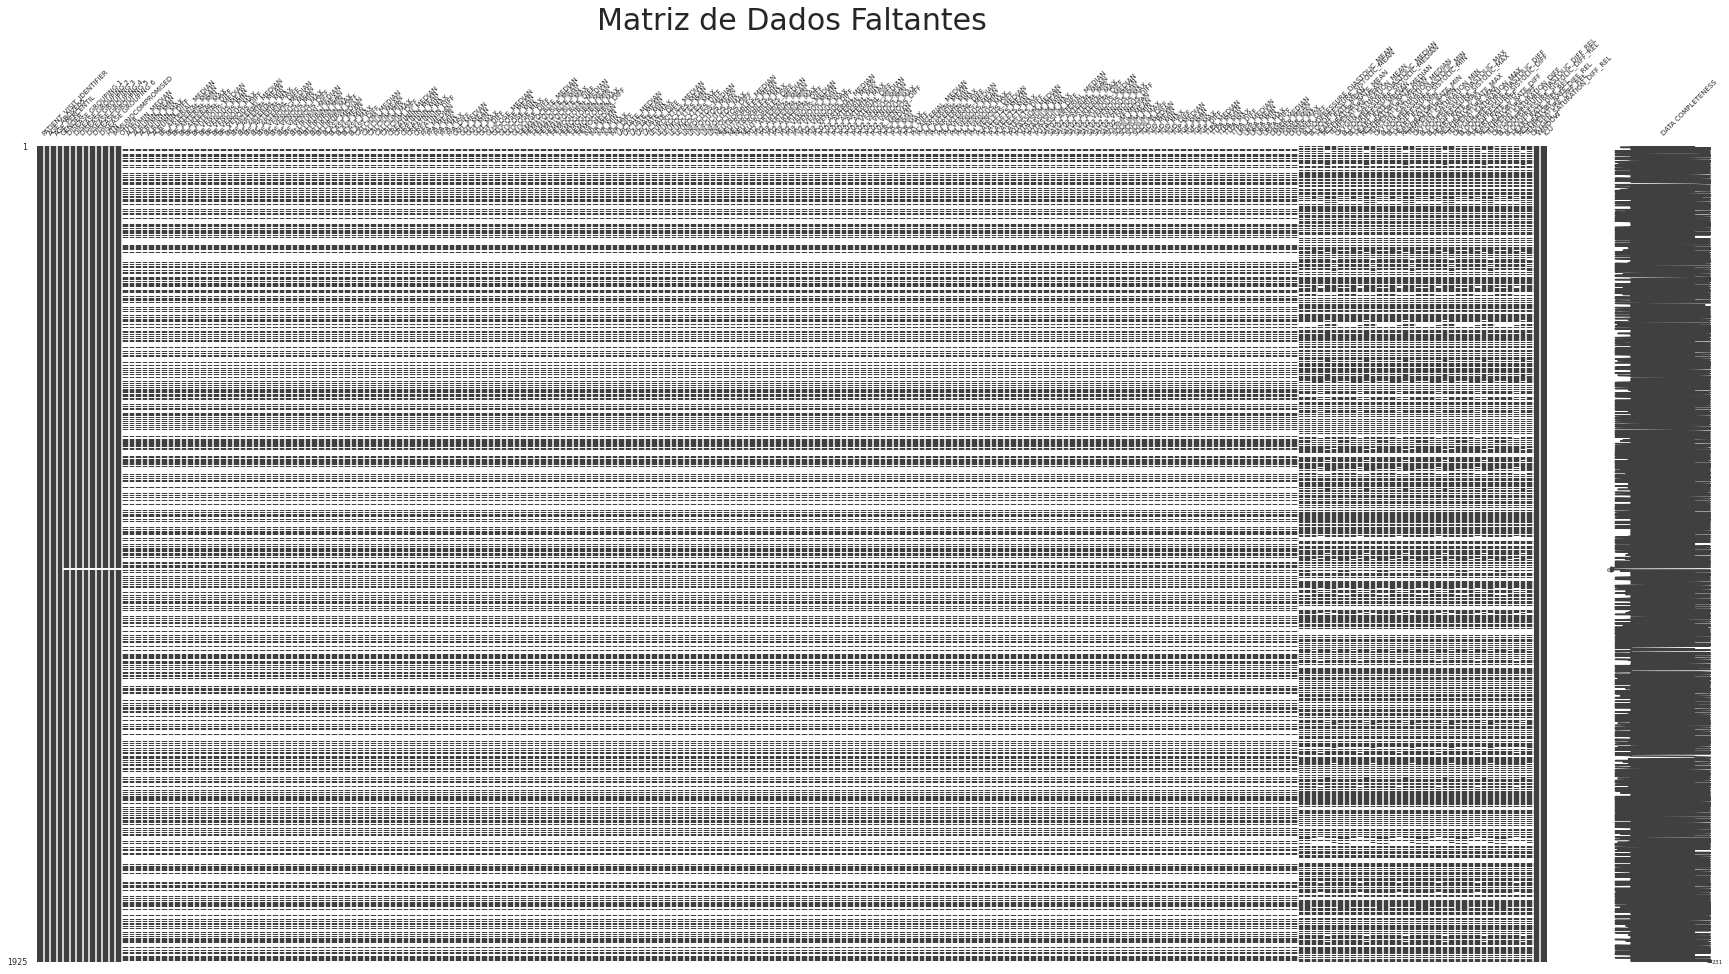

In [384]:
exibe_matriz_faltantes(dados_uti_sirio_libanes)

Como demonstrado, existem muitos dados fantantes na base de dados. 
Vamos abordar uma estrátegia para preencher os valores contínuos, com o mesmo valor anterior ao dado faltante, ou no caso da falta deste, com o valor a posteriror. 
Vamos utilizar a função da seção 3.2 Funções **preenche_base_dados_faltantes**, segue: 

In [385]:
dados_preenchido_sirios_libanes =preenche_base_dados_faltantes(dados_uti_sirio_libanes)

In [386]:
dados_preenchido_sirios_libanes.isna().sum()  

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            5
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 231, dtype: int64

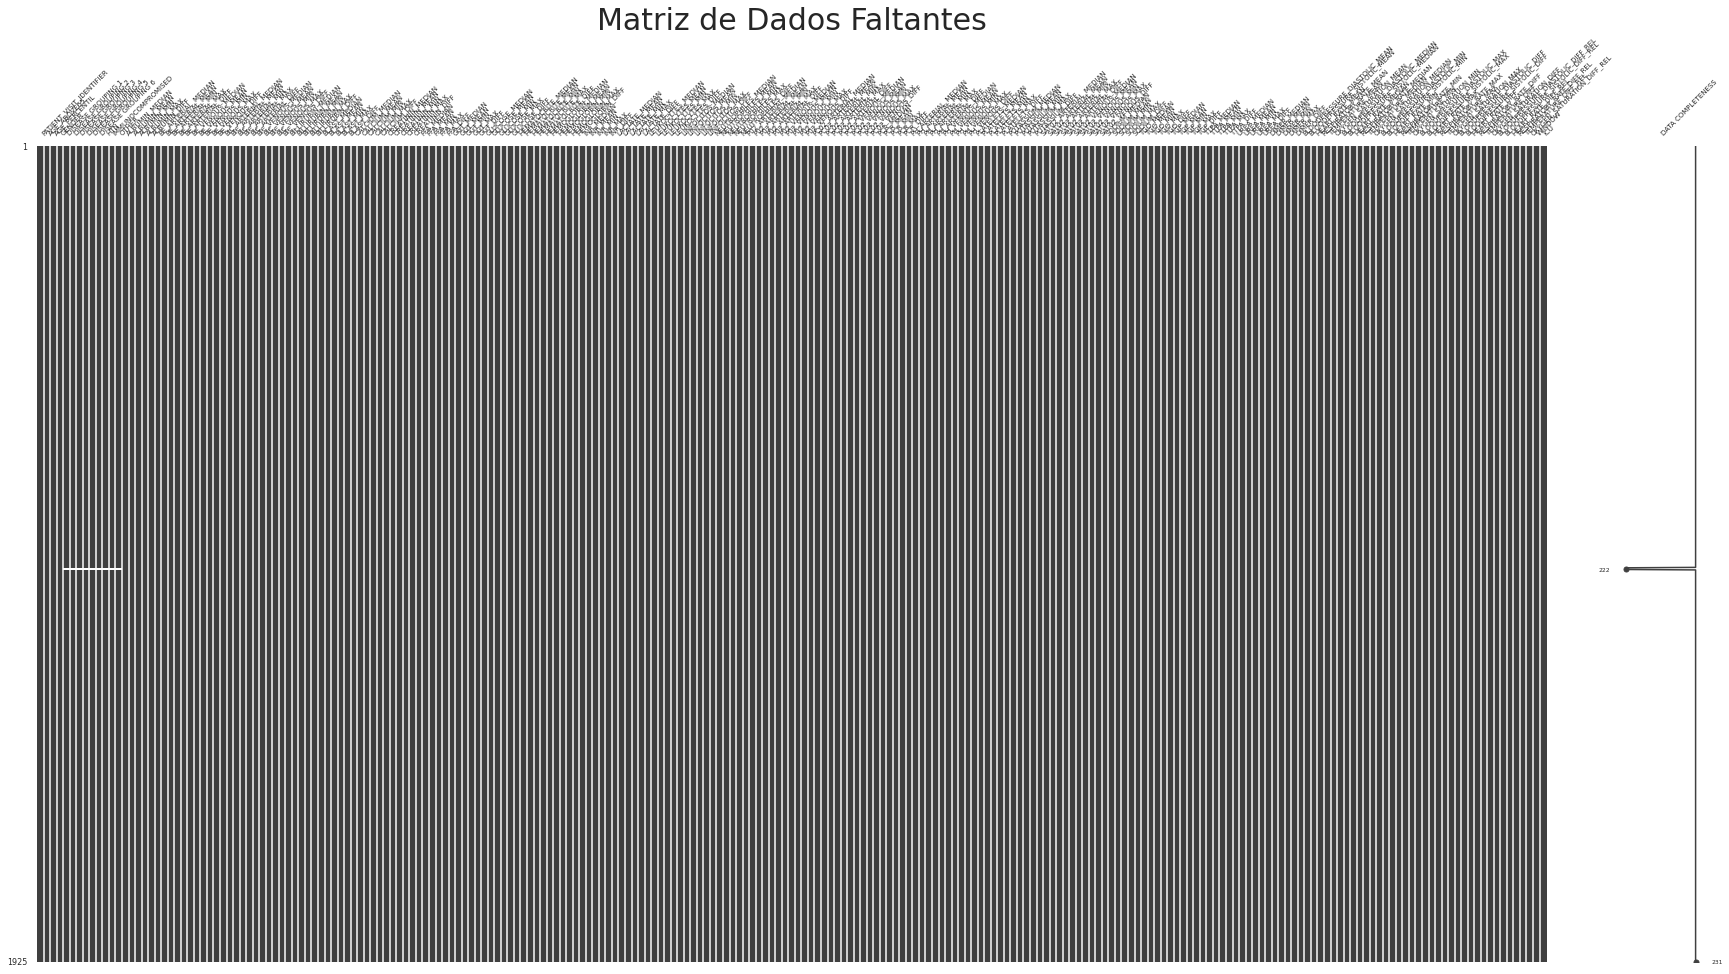

In [387]:
exibe_matriz_faltantes(dados_preenchido_sirios_libanes)

Ainda existem linhas com valores NaN

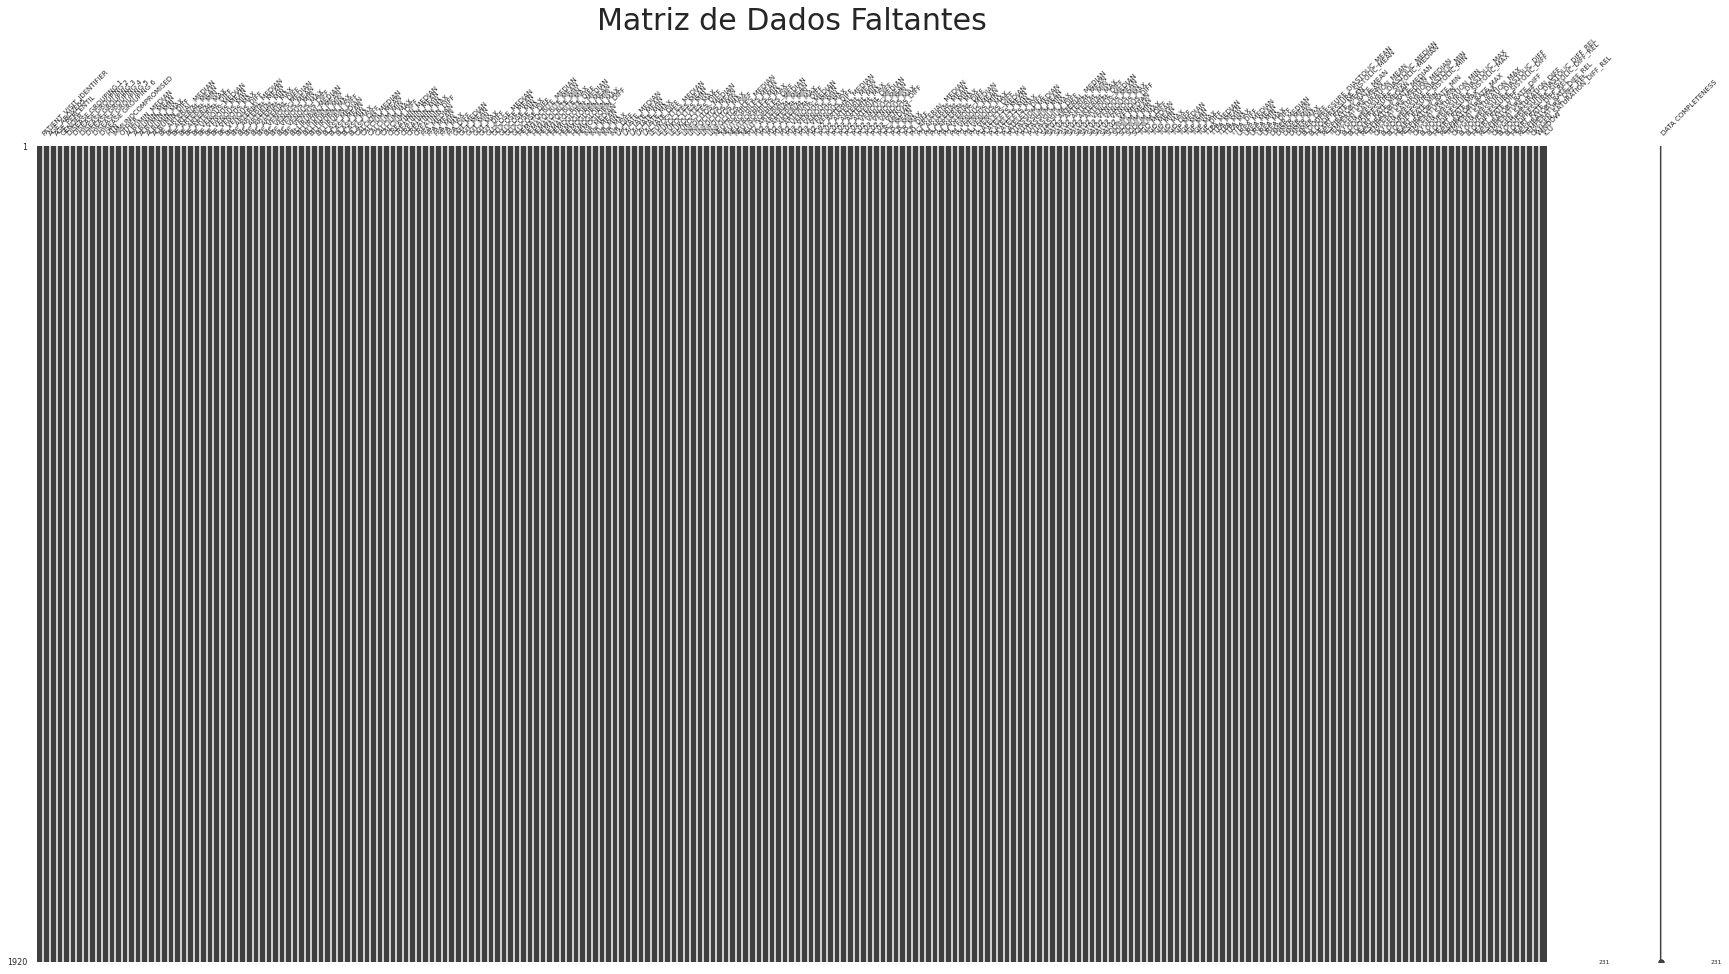

In [388]:
dados_preenchido_sirios_libanes = dados_preenchido_sirios_libanes.dropna()
exibe_matriz_faltantes(dados_preenchido_sirios_libanes)

In [389]:
dados_preenchido_sirios_libanes.isna().sum() 

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 231, dtype: int64

Após a aplicação da função dropna() não existem mais dados com valores faltantes.

###3.3.2 Análise da entrada dos pacientes na UTI

Os pacientes que entraram na UTI na janela de tempo de 0-2 (coluna **WINDOW**) não são interessantes para serem utilizados pelos algoritmos de Machine Learning, que objetivam prever a entrada de um paciente a partir das informações de diagnóstico, pois os dados do paciente que entrou na UTI no tempo 0-2 se referem a sua estádia na UTI, e não nos momentos anteriores a sua entrada [4]. 

Portanto, para os pacientes que tiverem com valor 0-2 na coluna **WINDOW** e valor 1 na coluna **ICU** serão retirados.

In [390]:
pacientes_a_remover = dados_preenchido_sirios_libanes.query("WINDOW == '0-2' and ICU == 1")['PATIENT_VISIT_IDENTIFIER'].values
dados_preenchido_sirios_libanes.query("WINDOW == '0-2' and ICU == 1")['PATIENT_VISIT_IDENTIFIER'].values

array([  1,  17,  27,  41,  47,  48,  54,  62,  85,  90, 104, 106, 109,
       117, 144, 176, 202, 206, 226, 233, 239, 261, 270, 282, 286, 306,
       315, 329, 359, 362, 366, 379])

In [391]:
len(dados_preenchido_sirios_libanes.query("WINDOW == '0-2' and ICU == 1")['PATIENT_VISIT_IDENTIFIER'].values)

32

32 registros de pacientes com valor 0-2 na coluna **WINDOW** e valor 1 na coluna **ICU**.

In [392]:
dados_para_machine_learn_sirios_libanes = dados_preenchido_sirios_libanes.query("PATIENT_VISIT_IDENTIFIER not in @pacientes_a_remover")
dados_para_machine_learn_sirios_libanes.describe() 

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,192.818182,0.457386,0.380682,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,0.212500,0.163636,0.828977,0.517913,0.517913,0.517913,0.517913,-1.0,-0.958386,-0.958386,-0.958386,-0.958386,-1.0,-0.926916,-0.926916,-0.926916,-0.926916,-1.0,-0.306430,-0.306430,-0.306430,-0.306430,-1.0,-0.305377,-0.305377,-0.305377,-0.305377,-1.0,-0.945935,-0.945935,-0.945935,...,-0.955277,-0.955277,-1.0,-0.073908,-0.339631,-0.267838,-0.458545,0.067973,0.747996,-0.078023,-0.344698,-0.270867,-0.452606,0.064864,0.751914,-0.001207,-0.187010,-0.243988,-0.469278,0.350887,0.841908,-0.248728,-0.432592,-0.313034,-0.381784,-0.017968,0.808029,-0.799862,-0.785938,-0.804580,-0.778209,-0.823458,-0.915593,-0.828593,-0.774857,-0.854690,-0.788155,-0.824412,-0.915552,0.201705
std,110.637724,0.498322,0.485692,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,0.409193,0.370050,0.376636,0.235219,0.235219,0.235219,0.235219,0.0,0.182797,0.182797,0.182797,0.182797,0.0,0.178947,0.178947,0.178947,0.178947,0.0,0.107783,0.107783,0.107783,0.107783,0.0,0.120988,0.120988,0.120988,0.120988,0.0,0.088861,0.088861,0.088861,...,0.125227,0.125227,0.0,0.248552,0.261409,0.241648,0.207736,0.239760,0.119912,0.254493,0.264516,0.247132,0.218765,0.247949,0.119985,0.270201,0.261183,0.260190,0.252147,0.193029,0.236797,0.246389,0.258776,0.274449,0.356890,0.262440,0.132323,0.322680,0.356078,0.324716,0.411909,0.276279,0.247695,0.287696,0.368311,0.240338,0.384405,0.274953,0.248093,0.401387
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Vamos dividir em dois estes dados data frames, uma com o registro da entrada do paciente, outro com o primeiro registro de pacientes que não entraram na UTI.

In [393]:
pacientes_entrada_UTI = dados_para_machine_learn_sirios_libanes.query("ICU == 1")
pacientes_entrada_UTI = pacientes_entrada_UTI.drop_duplicates(subset=['PATIENT_VISIT_IDENTIFIER'])
pacientes_entrada_UTI

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
14,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.463415,-0.463415,-0.463415,-0.463415,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.181070,-0.551603,-0.280660,-0.543785,0.057292,0.797149,-0.160494,-0.538462,-0.273585,-0.517241,0.107143,0.789474,-0.298969,-0.4500,-0.487179,-0.642857,0.142857,0.878788,-0.247863,-0.351351,-0.149254,-0.454545,0.101449,0.947368,-0.547826,-0.435583,-0.419847,-0.705882,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,ABOVE_12,1
58,11,1,80th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.456790,-0.338462,-0.396226,-0.050847,0.178571,0.736842,-0.456790,-0.338462,-0.396226,-0.034483,0.178571,0.736842,-0.216495,-0.0875,-0.264957,0.071429,0.494505,0.898990,-0.623932,-0.535135,-0.522388,-0.151515,-0.043478,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,1
69,13,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.952357,-1.0,-0.316667,-0.463077,-0.562736,-0.386441,0.049107,0.763158,-0.308642,-0.423077,-0.641509,-0.379310,0.107143,0.736842,-0.319588,-0.4125,-0.726496,-0.571429,0.208791,0.818182,-0.247863,-0.459

In [394]:
id_pacientes_nao_entraram_UTI = dados_para_machine_learn_sirios_libanes.groupby(['PATIENT_VISIT_IDENTIFIER']).agg({'ICU': max}).query("ICU == 0").index.values
id_pacientes_nao_entraram_UTI

array([  3,   4,   5,   6,   7,   8,   9,  10,  12,  16,  20,  21,  22,
        23,  25,  26,  30,  32,  33,  34,  35,  42,  43,  45,  46,  49,
        50,  51,  56,  57,  58,  59,  60,  61,  65,  66,  71,  72,  74,
        75,  76,  80,  83,  91,  92,  93,  95,  97,  98, 101, 108, 110,
       112, 114, 115, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131,
       134, 135, 143, 146, 147, 150, 153, 154, 158, 160, 162, 163, 167,
       169, 170, 171, 172, 173, 177, 180, 181, 184, 185, 186, 187, 189,
       190, 195, 196, 197, 198, 200, 204, 205, 208, 210, 211, 216, 221,
       223, 224, 225, 229, 236, 237, 238, 241, 244, 246, 247, 249, 251,
       253, 254, 257, 258, 262, 264, 268, 269, 271, 272, 273, 274, 276,
       277, 279, 280, 283, 284, 290, 293, 294, 295, 296, 298, 299, 300,
       301, 303, 304, 311, 312, 313, 314, 317, 319, 321, 324, 326, 328,
       330, 331, 332, 333, 334, 335, 336, 338, 340, 341, 344, 345, 346,
       348, 349, 350, 351, 353, 354, 355, 356, 365, 368, 369, 37

In [395]:
 pacientes_nao_entraram_UTI = dados_preenchido_sirios_libanes.query("PATIENT_VISIT_IDENTIFIER in @id_pacientes_nao_entraram_UTI")
 pacientes_nao_entraram_UTI

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
15,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
16,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
17,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
18,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,-0.407407,-0.538462,-0.547170,-0.525424,-0.107143,0.578947,-0.407407,-0.538462,-0.547170,-0.517241,-0.107143,0.578947,-0.175258,-0.2500,-0.401709,-0.428571,0.318681,0.838384,-0.589744,-0.675676,-0.641791,-0.575758,-0.275362,0.578947,-1.000000,-1.000000,-1.

###**3.3.3 Análise da entrada dos pacientes na UTI**
Vamos verificar quantos pacientes entraram ou não na UTI:

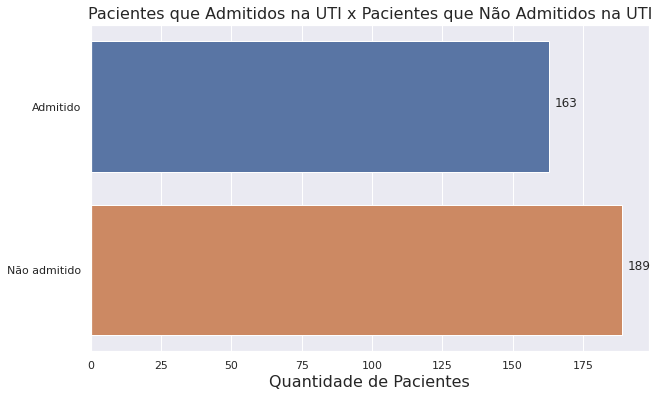

In [396]:
count_admitidos_UTI = dados_para_machine_learn_sirios_libanes.groupby(['PATIENT_VISIT_IDENTIFIER']).agg({'ICU': max})
dict_UTI = {0: "Não admitido", 1:"Admitido"}
count_admitidos_UTI['ICU'] = count_admitidos_UTI['ICU'].map(dict_UTI)

plot_countplot_horizontal(count_admitidos_UTI, 'ICU', 'Pacientes que Admitidos na UTI x Pacientes que Não Admitidos na UTI', 
                          "Quantidade de Pacientes",None)


Temos 163 pacientes admitidos na UTI, 189 não admitidos, totalizando 352 pacientes.

In [397]:
total_pacientes = 163 + 189
total_pacientes

352

 As colunas categoricas contêm informações de:
 - Doenças pré-existentes, 9 colunas: **'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN','IMMUNOCOMPROMISED', 'OTHER'**;
 - Idade acima de 65 anos: **AGE_ABOVE65**; 
 - categoria de idade: **AGE_PERCENTIL**; 
 - Gênero: **GENDER**;
 - E id do pacciente: **PATIENT_VISIT_IDENTIFIER.**

 Vamos análisar as informações com valores verdadeiros ou falsos, relacionados com admissão da UTI ou Não Admissão da UTI, as informações são estas:  **'AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN','IMMUNOCOMPROMISED', 'OTHER'**;


###**3.3.3.1 Análise-Dados Categoricos Pacientes Admitidos na UTI**

In [398]:
dados_categoricos_verdadeiro_falso_admitido_UTI = pacientes_entrada_UTI[['PATIENT_VISIT_IDENTIFIER','AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 
                                                                         'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 
                                                                         'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
                                                                         'IMMUNOCOMPROMISED', 'OTHER']]
dados_categoricos_verdadeiro_falso_admitido_UTI = dados_categoricos_verdadeiro_falso_admitido_UTI.drop_duplicates(subset=['PATIENT_VISIT_IDENTIFIER'])

dados_categoricos_verdadeiro_falso_admitido_UTI = dados_categoricos_verdadeiro_falso_admitido_UTI.drop(columns=['PATIENT_VISIT_IDENTIFIER'], axis = 1 )

dados_categoricos_verdadeiro_falso_admitido_UTI

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER
4,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
14,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
72,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1861,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1866,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,1,0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1904,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [399]:
df_categorico_admitido_UTI = constroi_df_categorico(dados_categoricos_verdadeiro_falso_admitido_UTI)
df_categorico_admitido_UTI

,Apresenta,Nao_apresenta
AGE_ABOVE65,100.0,63.0
GENDER,52.0,111.0
DISEASE GROUPING 1,23.0,140.0
DISEASE GROUPING 2,10.0,153.0
DISEASE GROUPING 3,27.0,136.0
DISEASE GROUPING 4,8.0,155.0
DISEASE GROUPING 5,34.0,129.0
DISEASE GROUPING 6,11.0,152.0
HTN,55.0,108.0
IMMUNOCOMPROMISED,33.0,130.0


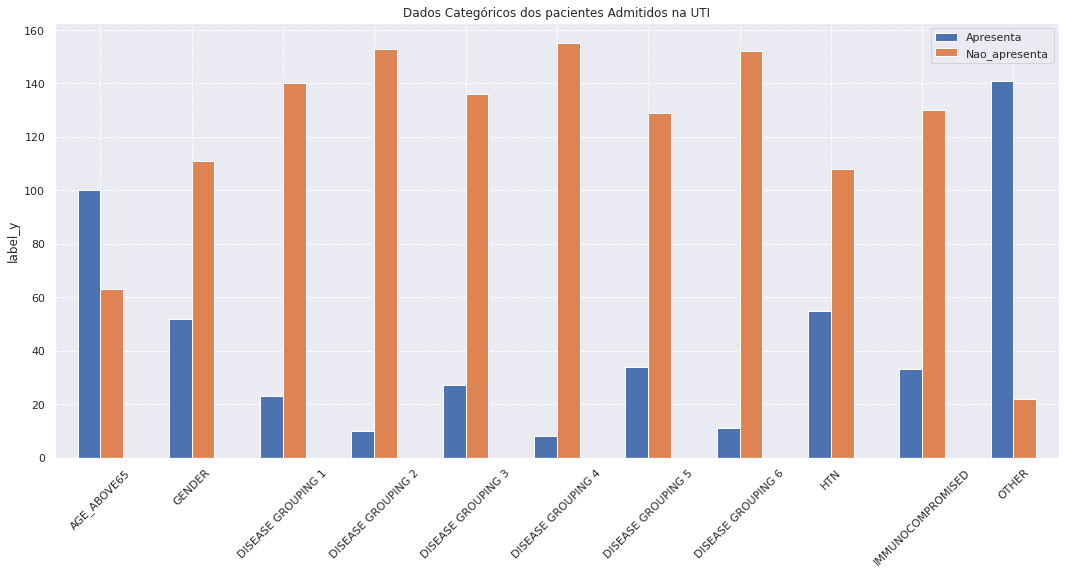

In [400]:
plot_dados_categorigos(df_categorico_admitido_UTI, 'Dados Categóricos dos pacientes Admitidos na UTI', 'Quantitativo')

Entre os dados categórigos, presume-se que o valor 1 tem valor positivo, isto é, "*Apresenta*" a informação da váriavel, e o valor 0 é negativo para, e "*Não apresenta*" aquela informação para a váriavel.

O campo **AGE_ABOVE65** representa o paciente com idade acima de 65 anos. Verifica-se que estes pacientes tiveram uma quantitativo maior de admissões na UTI, do que os menores de 65 anos.

Em relação a variável **GENDER**, gênero, não é possível identificar qual , masculino ou feminino, é mais admitido na UTI, não há essa informação, porém pode-se verificar que um gênero é mais internado que outro.


Aos grupo de doenças pré-existentes **DISEASE GROUPING** do **1** ao **6**, os pacientes que apresentaram esta caracteristica que foram admitidos na UTI, estavam em menor número em relaçaõ aqueles que não a apresentaram.

Para os campos **HTN** (Hipertensão ) e **IMMUNOCOMPROMISED** (Imunocomprometido), os pacientes que apresentavam foram minoria em relação aos que não as apresentaram, para serem internados na UTI

A variável **OTHER**, o qual o significado não foi encontrato, demonstra os pacientes que apresentam esta característica, foram em em sua maioria admitidos na UTI, em relação aqueles que não apresentam.

###**3.3.3.2 Análise-Dados Categoricos Pacientes Admitidos na UTI**

In [401]:
dados_categoricos_verdadeiro_falso_NAO_admitido_UTI = pacientes_nao_entraram_UTI[['AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 
                                                                                  'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 
                                                                                  'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
                                                                                  'IMMUNOCOMPROMISED', 'OTHER','WINDOW']].query("WINDOW == '0-2' ")
dados_categoricos_verdadeiro_falso_NAO_admitido_UTI = dados_categoricos_verdadeiro_falso_NAO_admitido_UTI.drop(['WINDOW'], axis =1)
dados_categoricos_verdadeiro_falso_NAO_admitido_UTI

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER
15,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
20,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
35,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1885,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1890,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1905,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1915,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [402]:
df_categorico_NAO_admitido_UTI = constroi_df_categorico(dados_categoricos_verdadeiro_falso_NAO_admitido_UTI)
df_categorico_NAO_admitido_UTI

,Apresenta,Nao_apresenta
AGE_ABOVE65,61.0,128.0
GENDER,82.0,107.0
DISEASE GROUPING 1,16.0,173.0
DISEASE GROUPING 2,2.0,187.0
DISEASE GROUPING 3,11.0,178.0
DISEASE GROUPING 4,1.0,188.0
DISEASE GROUPING 5,17.0,172.0
DISEASE GROUPING 6,9.0,180.0
HTN,24.0,165.0
IMMUNOCOMPROMISED,26.0,163.0


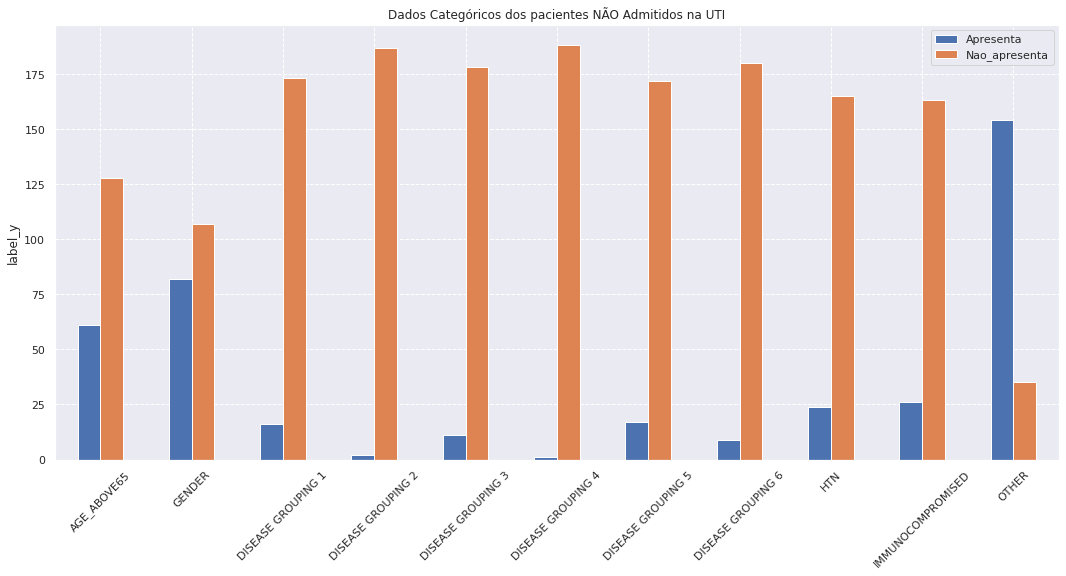

In [403]:
plot_dados_categorigos(df_categorico_NAO_admitido_UTI, 'Dados Categóricos dos pacientes NÃO Admitidos na UTI', 'Quantitativo')

Na análise dos pacientes que Não foram admitidos na UTI :

O campo **AGE_ABOVE65** representa o paciente com idade acima de 65 anos. Pode-se verificar que pacientes não idosos, menores de 65 anos, são frequentemente menos admitidos na UTI

Em relação a variável **GENDER**, gênero, não é possível identificar qual , masculino ou feminino, é mais não admitido na UTI, não há essa informação, mas os valores se aproxima neste quesito.

Os grupo de doenças pré-existentes **DISEASE GROUPING** do **1** ao **6**, o quantitativo de pacientes que não apresentam esta característica é muito menor do que os que apresentam, isto é, os que não apresentam a doença geralmente não são admitdos na UTI, os que apresentam também não são, mas com menor frequencia.

Para os campos **HTN** (Hipertensão ) e **IMMUNOCOMPROMISED** (Imunocomprometido), os pacientes que apresentavam foram minoria em relação aos que não as apresentaram, para NÃOserem internados na UTI

A variável **OTHER**, o qual o significado não é disponível, demonstra que os pacientes que apresentam esta característica, tem um quantitativo maior daqueles que não apresentam, em relação a não ser admitido na UTI.

###**3.3.3.3 Análise dos comparativos de informações Categoricas dos Pacientes**
Entre os dados catecórigos de pacientes em relação aos que foram admitidos nas UTI ou não, os grupos de doenças prévias não eram relevantes para esta tomada de decisão, nem as informações de hipertensão e imunocomprometidomento.
A varíavel de idade acima de 65 anos, se mostrou relevante, como verificado, a maioria dos pacientes que apresentavam esta característica foram admitidos na UTI, e a maioria dos que não a apresentavam estão no grupo que não foram admitidos na UTI. 

O mesmo ocorre com o campo **OTHER**, embora não seja especificado qual o significado desta informação, apenas supõem-se que não seja correlata a nenhuma das variáveis do conjunto.

###**3.3.3.4 Análise- Informações de valores contínuos**
Para isolar os dados contínuos e comparar pacientes que entraram ou não na UTI, vamos agrupar os participantes que entraram na UTI pela coluna **WINDOW** valor '0-2', junto com os participantes que não foram admitidos na UTI.

A intenção de escolher o valor da mediana para análise (*MEDIAN*) dos dados categórigos, deve-se a presunção de intuir que a informação da maior parte dos dados pode influenciar na decisão de se admitir ou não um paciente na UTI, isto se um conjunto maior ou menor daquela varíavel poderá acarretar em uma decisão.

Os dados foram separados em duas bases, uma para pacientes admitidos na UTI, outra para não admitidos na UTI, e plotados seu gráficos.


In [404]:
dados_para_machine_learn_sirios_libanes = dados_para_machine_learn_sirios_libanes.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
dados_para_machine_learn_sirios_libanes.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0

In [408]:
continuos_adm_UTI = prepara_continuos(dados_para_machine_learn_sirios_libanes.query(" ICU == 1 "))
continuos_adm_UTI.sample(5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
32,1,Above 90th,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.727749,-0.727749,-0.727749,-0.727749,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.121951,-0.121951,-0.121951,-0.121951,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-1.0,-0.283951,-0.369231,-0.622642,-0.322034,0.071429,0.684211,-0.283951,-0.369231,-0.622642,-0.310345,0.071429,0.684211,-0.072165,-0.1125,-0.470085,-0.214286,0.428571,0.878788,-0.504274,-0.556757,-0.701493,-0.393939,-0.130435,0.684211,-1.000000,-1.0,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
136,0,40th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.948718,-0.948718,-0.948718,...,-0.996993,-1.0,-0.160494,-0.538462,-0.339623,0.288136,0.678571,0.631579,-0.160494,-0.538462,-0.339623,0.310345,0.678571,0.631579,0.030928,-0.2500,-0.213675,0.428571,0.802198,0.858586,-0.418803,-0.675676,-0.477612,0.151515,0.362319,0.631579,-1.000000,-1.0,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
70,1,60th,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-1.0,0.333333,-0.076923,0.113208,-0.389831,0.428571,0.736842,0.333333,-0.076923,0.113208,-0.379310,0.428571,0.736842,0.443299,0.1250,0.196581,-0.285714,0.648352,0.898990,-0.076923,-0.351351,-0.119403,-0.454545,0.159420,0.736842,-1.000000,-1.0,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
84,1,70th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-1.0,-0.530864,-0.784615,0.132075,-0.050847,0.464286,0.315789,-0.530864,-0.784615,0.132075,-0.034483,0.464286,0.315789,-0.278351,-0.4500,0.213675,0.071429,0.670330,0.737374,-0.675214,-0.848649,-0.104478,-0.151515,0.188406,0.315789,-1.000000,-1.0,-1.00000,-1.000000,-1.000000,-1.000000,-1.0000

In [409]:
continuos_N_adm_UTI = prepara_continuos(dados_para_machine_learn_sirios_libanes.query(" ICU == 0 "))
continuos_N_adm_UTI.sample(5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
162,0,10th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.365854,-0.365854,-0.365854,-0.365854,-1.0,-0.938950,-0.938950,-0.938950,...,-0.987511,-1.0,0.086420,-0.384615,-0.396226,-0.457627,0.035714,0.789474,0.086420,-0.384615,-0.396226,-0.448276,0.035714,0.789474,0.237113,-0.1250,-0.264957,-0.357143,0.406593,0.919192,-0.247863,-0.567568,-0.522388,-0.515152,-0.159420,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
107,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.962323,-0.962323,-0.962323,...,-0.973943,-1.0,0.251029,-0.230769,-0.528302,-0.548023,0.214286,0.789474,0.333333,-0.230769,-0.566038,-0.517241,0.214286,0.789474,0.237113,0.0000,-0.418803,-0.500000,0.516484,0.919192,-0.076923,-0.459459,-0.567164,-0.575758,-0.014493,0.789474,-0.826087,-1.000000,-0.908397,-0.941176,-1.00000,-1.000000,-0.884058,-1.000000,-0.916985,-0.939068,-1.000000,-1.000000,0-2,0
49,1,Above 90th,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.884817,-0.884817,-0.884817,-0.884817,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.170732,-0.170732,-0.170732,-0.170732,-1.0,-0.936159,-0.936159,-0.936159,...,-0.871256,-1.0,-0.185185,-0.307692,0.339623,0.830508,0.250000,0.842105,-0.185185,-0.307692,0.339623,0.862069,0.250000,0.842105,0.010309,-0.0625,0.401709,1.000000,0.538462,0.939394,-0.435897,-0.513514,0.059701,0.636364,0.014493,0.842105,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
144,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.920287,-1.0,0.086420,-0.153846,-0.047170,-0.593220,-0.053571,0.815789,0.086420,-0.153846,-0.047170,-0.586207,-0.053571,0.815789,0.030928,0.0000,0.008547,-0.500000,0.340659,0.919192,-0.076923,-0.351351,-0.208955,-0.636364,-0.217391,0.842105,-0.652174,-0.877301,-0.923664,

In [411]:
df_median_continuos_UTI = continuos_adm_UTI.loc[:, continuos_adm_UTI.columns.str.contains('MEDIAN')]
df_median_continuos_UTI.sample(5)

,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN
143,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.849965,-0.742004,-0.958528,-0.891993,-0.178197,-0.231707,-0.959849,1.000000,-0.769023,-0.748963,-0.825530,-0.170732,-0.704142,-0.77931,-0.754601,-0.824197,0.234043,0.363636,-0.642190,-0.407407,0.939394,0.345679,0.028571,-0.995335,-0.987424,-0.846633,-0.773494,-0.978029,-0.432099,-0.369231,-0.679245,-0.103448,0.25,0.526316
58,0.605263,-1.0,-0.895288,-0.317073,-0.414634,-0.954997,-1.0,0.357143,-0.903751,-0.742004,-0.958528,-0.743017,0.102725,0.060976,-0.907152,1.000000,-0.692545,-0.809129,-0.731092,-0.170732,-0.609467,-0.77931,-0.914110,-0.310397,0.234043,0.696970,-0.503338,-0.962963,0.939394,0.604938,-0.314286,-0.991416,-0.994665,-0.776567,-0.913253,-0.936168,-0.456790,-0.738462,-0.528302,-0.137931,-0.25,0.789474
34,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.930644,-0.742004,-0.958528,-0.891993,-0.064990,0.060976,-0.959849,1.000000,-0.843183,-0.846473,-0.874350,-0.170732,-0.704142,-0.77931,-0.754601,-0.789036,0.234043,0.363636,-0.439252,-0.555556,0.939394,0.345679,-0.142857,-0.995428,-0.986662,-0.846633,-0.927711,-0.978029,0.037037,-0.461538,-0.226415,-0.586207,0.25,0.947368
30,0.605263,-1.0,-0.738220,-0.317073,-0.268293,-0.938950,-1.0,0.357143,-0.958953,-0.842217,-0.984813,-0.716946,-0.073375,-0.097561,-0.882058,-0.782186,-0.838934,-0.807054,-0.886755,-0.170732,-0.668639,-0.77931,-0.803681,-0.855198,0.234043,0.545455,-0.452603,-0.814815,0.939394,0.456790,-0.200000,-0.997387,-0.993521,-0.836512,-0.937349,-0.988205,0.061728,-0.200000,-0.396226,-0.724138,-0.25,0.789474
74,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.919321,-0.742004,-0.958528,-0.891993,-0.392034,-0.390244,-0.959849,1.000000,-0.902279,-0.975104,-0.905962,-0.170732,-0.704142,-0.77931,-0.754601,-0.686957,0.234043,0.363636,-0.516689,-0.481481,0.939394,0.345679,0.066667,-0.996268,-0.993521,-0.846633,-0.893976,-0.930309,-0.407407,-0.692308,-0.207547,-0.379310,0.50,0.578947


In [412]:
df_median_continuos_Nao_UTI = continuos_N_adm_UTI.loc[:, continuos_adm_UTI.columns.str.contains('MEDIAN')]
df_median_continuos_Nao_UTI.sample(5)

,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN
71,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.957091,-1.0,0.346939,-0.907997,-0.742004,-0.958528,-0.891993,-0.085954,-0.097561,-0.882058,-0.938103,-0.754732,-0.778008,-0.804722,-0.170732,-0.704142,-0.77931,-0.754601,-0.827221,0.234043,0.363636,-0.562083,-0.592593,0.939394,0.345679,-0.371429,-0.995148,-0.988567,-0.901907,-0.821687,-0.978029,-0.012346,-0.330769,0.009434,-0.586207,0.357143,0.736842
92,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.949045,-0.742004,-0.958528,-0.891993,-0.362683,-0.426829,-0.959849,-0.928457,-0.734647,-0.551867,-0.836335,-0.170732,-0.704142,-0.77931,-0.754601,-0.865406,0.234043,0.363636,-0.263017,-0.703704,0.939394,0.345679,0.200000,-0.989363,-0.978659,-0.846633,-0.889157,-0.978029,-0.111111,-0.184615,-0.415094,-0.655172,-0.071429,0.947368
38,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.854526,-1.0,0.357143,-0.834395,-0.458422,-0.580607,-0.891993,-0.383648,-0.426829,-0.907152,-0.909332,-0.736964,-0.825726,-0.783914,-0.170732,-0.704142,-0.77931,-0.754601,-0.786767,0.234043,0.363636,-0.436582,-0.481481,0.939394,0.345679,0.200000,-0.950732,-0.940168,-0.858311,-0.778313,-0.978029,-0.185185,-0.015385,-0.528302,-0.448276,-0.321429,0.894737
137,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.960230,-1.0,0.367347,-0.855626,-0.742004,-0.958528,-0.891993,-0.077568,-0.182927,-0.957340,1.000000,-0.619930,-0.676349,-0.701080,-0.170732,-0.704142,-0.77931,-0.754601,-0.582987,0.234043,0.363636,-0.372497,-0.703704,0.939394,0.345679,0.142857,-0.998507,-0.993521,-0.825613,-0.918072,-0.949119,0.432099,0.323077,-0.094340,-0.517241,-0.107143,0.842105
85,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.878273,-0.742004,-0.958528,-0.891993,-0.262055,-0.292683,-0.907152,1.000000,-0.911163,-0.894191,-0.930772,-0.170732,-0.704142,-0.77931,-0.754601,-0.911531,0.234043,0.363636,-0.845127,-0.481481,0.939394,0.345679,-0.028571,-0.995708,-0.992759,-0.787466,-0.826506,-0.995374,-0.407407,-0.846154,-0.584906,-0.793103,0.035714,0.684211


In [416]:
melt_UTI = melt_continuos(df_median_continuos_UTI)
melt_UTI

,tipo_categoria,id,valor
0,ALBUMIN_MEDIAN,0,0.605263
1,BE_ARTERIAL_MEDIAN,0,-1.000000
2,BE_VENOUS_MEDIAN,0,-1.000000
3,BIC_ARTERIAL_MEDIAN,0,-0.317073
4,BIC_VENOUS_MEDIAN,0,-0.317073
...,...,...,...
6841,BLOODPRESSURE_SISTOLIC_MEDIAN,162,-0.384615
6842,HEART_RATE_MEDIAN,162,-0.320755
6843,RESPIRATORY_RATE_MEDIAN,162,-0.448276
6844,TEMPERATURE_MEDIAN,162,-0.071429


In [415]:
melt_nao_UTI = melt_continuos(df_median_continuos_Nao_UTI)
melt_nao_UTI

,tipo_categoria,id,valor
0,ALBUMIN_MEDIAN,0,-0.263158
1,BE_ARTERIAL_MEDIAN,0,-1.000000
2,BE_VENOUS_MEDIAN,0,-1.000000
3,BIC_ARTERIAL_MEDIAN,0,-0.317073
4,BIC_VENOUS_MEDIAN,0,-0.317073
...,...,...,...
7933,BLOODPRESSURE_SISTOLIC_MEDIAN,188,-0.292308
7934,HEART_RATE_MEDIAN,188,0.056604
7935,RESPIRATORY_RATE_MEDIAN,188,-0.517241
7936,TEMPERATURE_MEDIAN,188,0.535714


###**3.3.3.4.1 Valores Contínuos - Pacientes Admitidos na UTI**

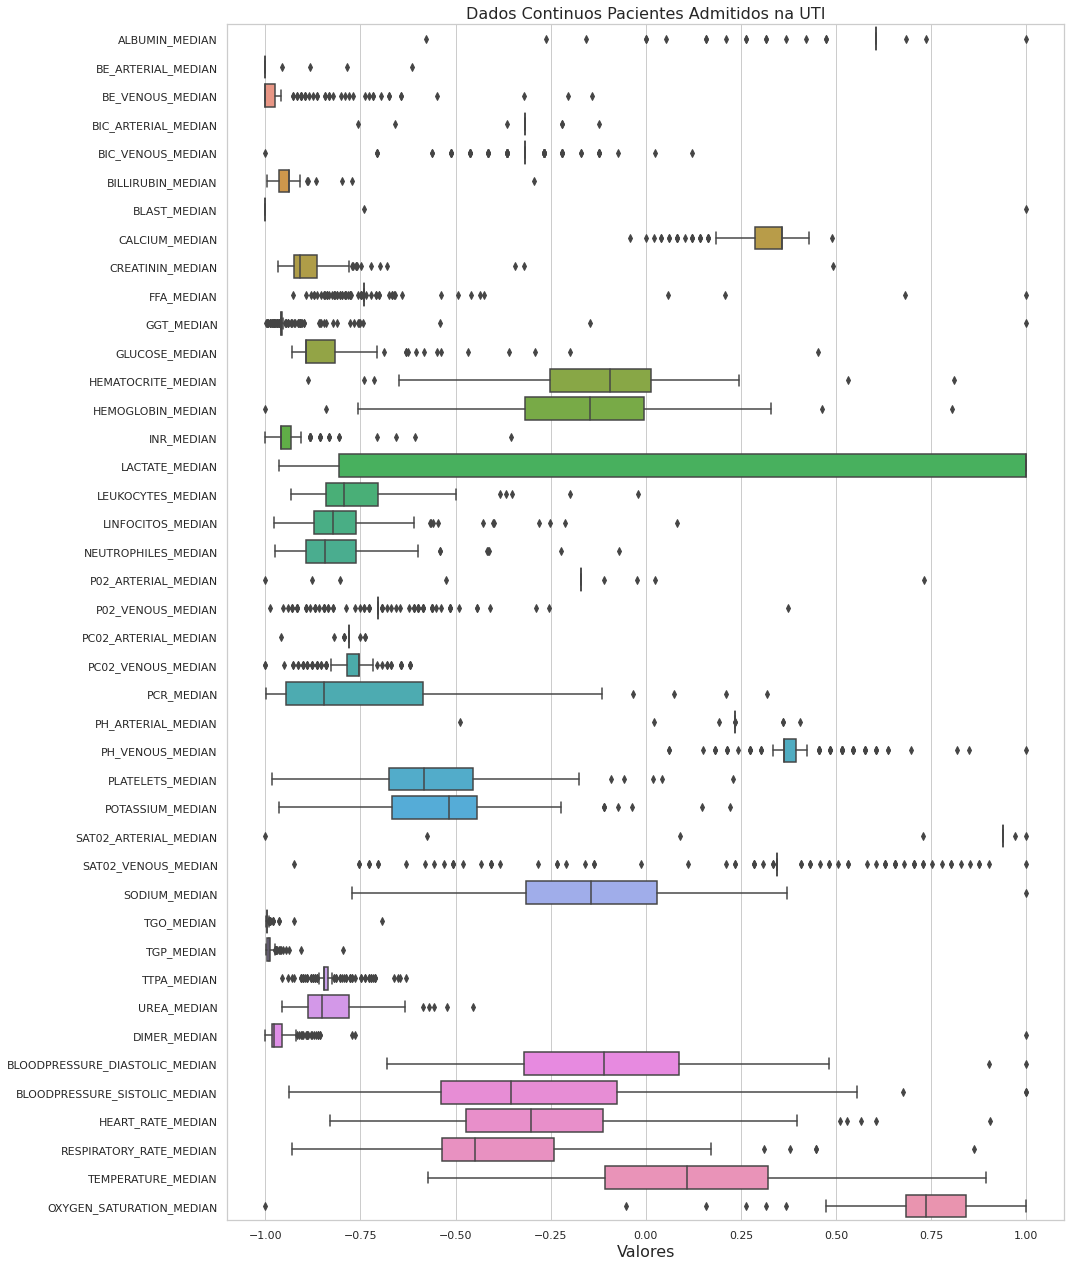

In [433]:
barplot_continuos(melt_UTI, 'Dados Continuos Pacientes Admitidos na UTI', 'Valores', None)

O dado contínuo que mais se destaca é o **LACTOSE_MEDIAN** com valores próximos ao 1, pressupõe-se, possivelmente que a maior parte dos pacientes admitidos na UTI estão com valores positivos neste indicador.

###**3.3.3.4.2 Valores Contínuos - Pacientes NÃO Admitidos na UTI**

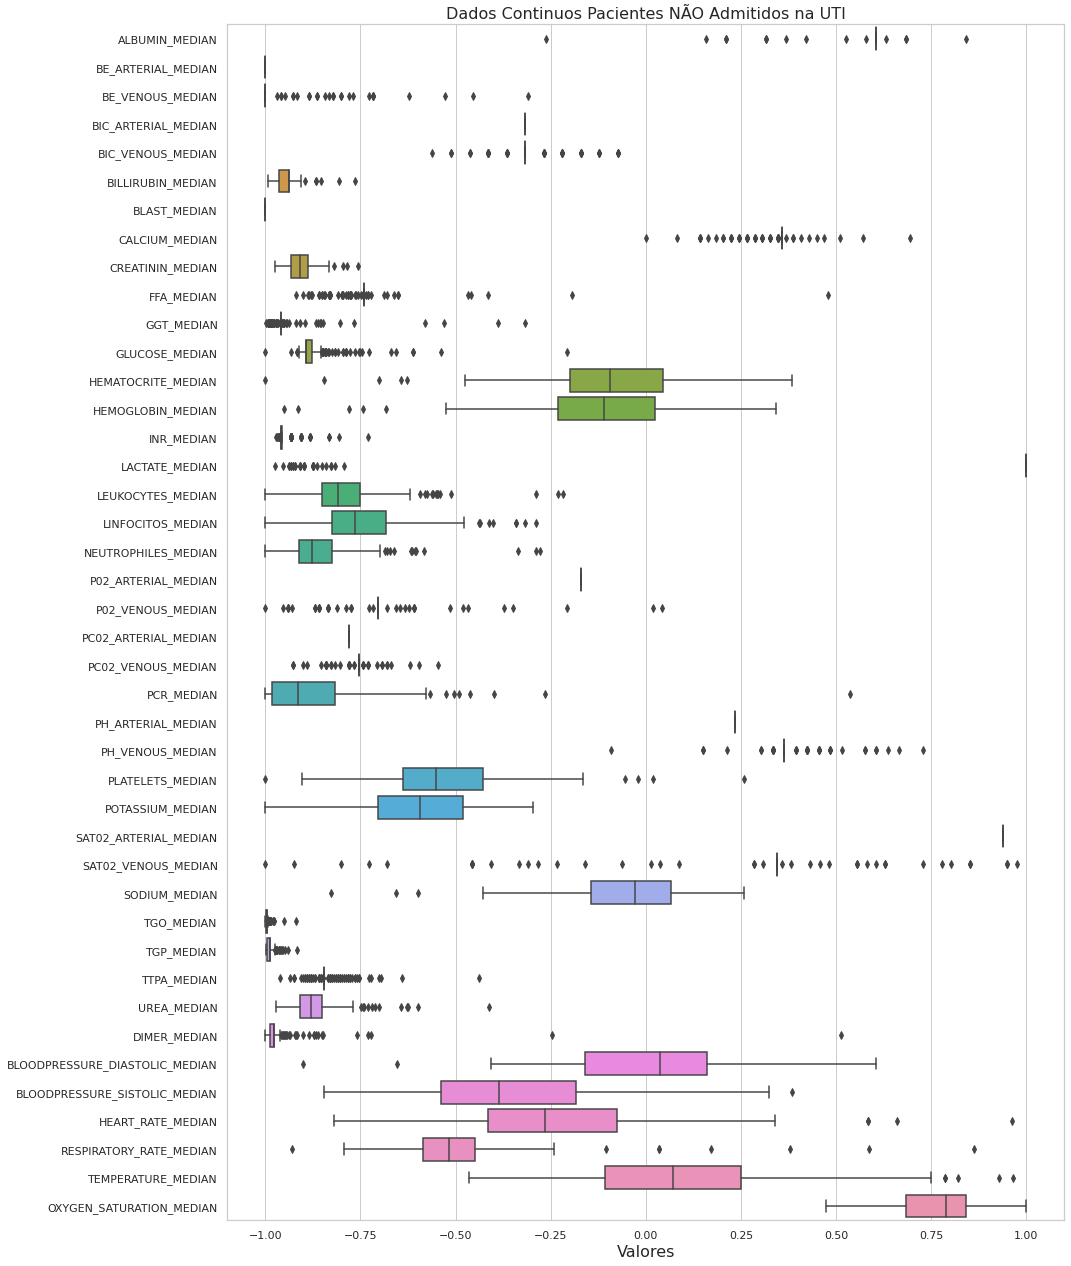

In [434]:
barplot_continuos(melt_nao_UTI, 'Dados Continuos Pacientes NÃO Admitidos na UTI', 'Valores', None)

No caso dos pacientes que não são admitidos na UTI, também O dado contínuo que mais se destaca é o **LACTOSE_MEDIAN** com valores próximos a -1.

###**3.3.3.4.3 Análise - Pacientes NÃO Admitidos na UTI X Pacientes Admitidos na UTI** 

O dado que mais se destacou foi **LACTOSE_MEDIAN** apresentado valores próximos a 1, nos casos de pacientes admitidos na UTI, e próximos a -1 nos caos de pacientes não admitidos na UTI, demosntrando uma significativa diferença.

A maioria dos outras variáveis com valores contínuos não apresentou diferenças relevantes para considerar que possa influenciar signitificativamente na decição se admitir um paciente na UTI ou não.

#8. Referências
###[1] COVID-19 
>https://pt.wikipedia.org/wiki/COVID-19
###[2] Pandemia de COVID-19
>https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19
###[3] The COVID-19 coronavirus epidemic has a natural origin, scientists say
>https://www.eurekalert.org/pub_releases/2020-03/sri-tcc031720.php
###[4] Diante da falta de vagas medicos discutem regras para escolher quem vai para uti
>https://oglobo.globo.com/sociedade/diante-da-falta-de-vagas-medicos-discutem-regras-para-escolher-quem-vai-para-uti-24962507
###[5] COVID-19 NO BRASIL - Casos e Óbitos
>https://susanalitico.saude.gov.br/extensions/covid-19_html/covid-19_html.html
###[6] COVID-19 - Clinical Data to assess diagnosis Sírio-Libanês data for AI and Analytics by Data Intelligence Team
>https://www.kaggle.com/S%C3%ADrio-Libanes/covid19
